In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    N = y.shape[0]
    e = y - tx@w
    return 1/N * 0.5 * e.T@e 

# 2 Grid Search

Fill in the function `grid_search()` below:

In [5]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i, w0_ in enumerate(w0):
        for j, w1_ in enumerate(w1):
            losses[i,j] = compute_loss(y, tx, np.array([w0_, w1_])) 
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.014 seconds


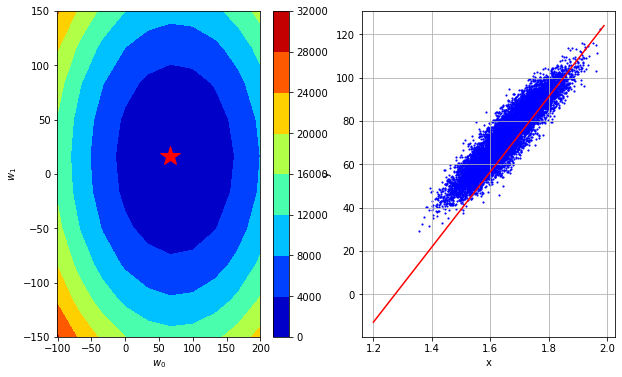

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    N = y.shape[0]
    e = y - tx@w
    return -1/N * tx.T@e

Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma, verbose=False):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    w.astype(np.float64)
    for n_iter in range(max_iters):
        loss = compute_loss(y, tx, w)
        gradient = compute_gradient(y, tx, w)
        
        w = w - gamma * gradient

        # store w and loss
        ws.append(w)
        losses.append(loss)
        if verbose:
            print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [27]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 100
gamma = 0.1

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))
print('w* = {}'.format(gradient_ws[-1]))
print('mse = {}'.format(gradient_losses[-1]))

Gradient Descent: execution time=0.047 seconds
w* = [73.29197521 13.47935439]
mse = 4.42499935134104


In [25]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)
interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description=&#39;n_iter&#39;, max=101, min=1), Output()), _dom_classes=(&#39;widg…

&lt;function __main__.plot_figure(n_iter)&gt;

# 4 Stochastic gradient descent

In [11]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    N = y.shape[0]
    e = y - tx@w
    return -1/N * tx.T @ e

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""

    losses = []
    ws = [w_initial]
    w = w_initial
    for y_batch, tx_batch in batch_iter(y, tx, batch_size, num_batches=max_iters):
        gradient = compute_stoch_gradient(y_batch, tx_batch, w)
        loss = compute_loss(y_batch, tx_batch, w)
        w = w - gamma * gradient
        losses.append(loss)
        ws.append(w)

    return losses, ws

In [12]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 20
gamma = 0.7
batch_size = 70

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=0.001 seconds


In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description=&#39;n_iter&#39;, max=51, min=1), Output()), _dom_classes=(&#39;widge…

&lt;function __main__.plot_figure(n_iter)&gt;

# 5 Effect of Outliers

### Exercise 5


[]

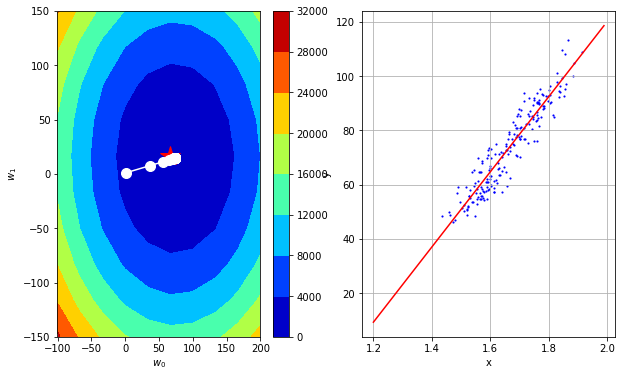

In [14]:
# WITHOUT OUTLIERS
height, weight, gender = load_data(sub_sample=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)


grid_w0, grid_w1 = generate_w(num_intervals=10)
grid_losses = grid_search(y, tx, grid_w0, grid_w1)
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)

w_initial = np.array([1,1])
gamma = 0.5
max_iters = 100
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma, verbose=False)
fig = gradient_descent_visualization(gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, max_iters)
fig.set_size_inches(10.0, 6.0)

plt.plot()





[]

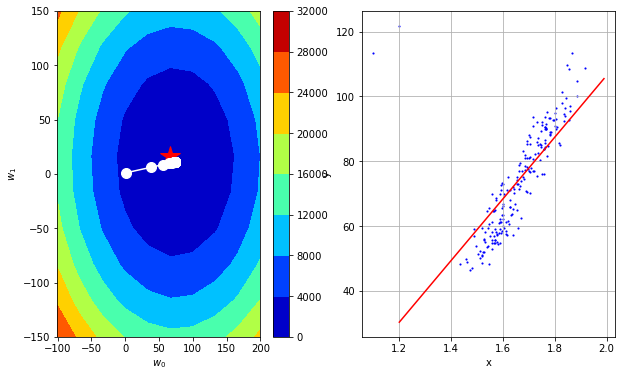

In [15]:
# WITH OUTLIERS
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)


grid_w0, grid_w1 = generate_w(num_intervals=10)
grid_losses = grid_search(y, tx, grid_w0, grid_w1)
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)

w_initial = np.array([1,1])
gamma = 0.5
max_iters = 100
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma, verbose=False)
fig = gradient_descent_visualization(gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, max_iters)
fig.set_size_inches(10.0, 6.0)

plt.plot()

# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [16]:
def compute_loss(y, tx, w):
    N = y.shape[0]
    e = y - tx@w
    sgn = np.sign(e)
    e = sgn * e
    return 1/N * e.sum()

In [17]:
def compute_subgradient(y, tx, w):
    N = y.shape[0]
    e = y - tx@w
    e = np.sign(e)

    return -1/N * (tx.T * e).T.sum(axis=0)

In [18]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """Subgradient descent algorithm."""

    losses = []
    ws = [w_initial]
    w = w_initial
    for _ in range(max_iters):
        gradient = compute_subgradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        w = w - gamma * gradient
        losses.append(loss)
        ws.append(w)

    return losses, ws

In [19]:
height, weight, gender = load_data(sub_sample=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)


grid_w0, grid_w1 = generate_w(num_intervals=10)
grid_losses = grid_search(y, tx, grid_w0, grid_w1)
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)

w_initial = np.array([1,1])
gamma = 0.7
max_iters = 1000
gradient_losses, gradient_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
# fig = gradient_descent_visualization(gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, max_iters)
# fig.set_size_inches(10.0, 6.0)

# plt.plot()

In [20]:
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description=&#39;n_iter&#39;, max=1001, min=1), Output()), _dom_classes=(&#39;wid…

&lt;function __main__.plot_figure(n_iter)&gt;

# Stochastic subgradient descent

In [21]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Subgradient descent algorithm."""

    losses = []
    ws = [w_initial]
    w = w_initial
    for y_batch, tx_batch in batch_iter(y, tx, batch_size, num_batches=max_iters):
        gradient = compute_subgradient(y_batch, tx_batch, w)
        loss = compute_loss(y_batch, tx_batch, w)
        w = w - gamma * gradient
        losses.append(loss)
        ws.append(w)

    return losses, ws

In [22]:
height, weight, gender = load_data(sub_sample=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)


grid_w0, grid_w1 = generate_w(num_intervals=10)
grid_losses = grid_search(y, tx, grid_w0, grid_w1)
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)

w_initial = np.array([1,1])
gamma = 1.5
batch_size = 70
max_iters = 100
gradient_losses, gradient_ws = stochastic_subgradient_descent(y, tx, w_initial, batch_size, max_iters, gamma)
# fig = gradient_descent_visualization(gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, max_iters)
# fig.set_size_inches(10.0, 6.0)

# plt.plot()

In [23]:
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description=&#39;n_iter&#39;, max=101, min=1), Output()), _dom_classes=(&#39;widg…

&lt;function __main__.plot_figure(n_iter)&gt;